In [1]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [2]:
# Getting Files Situated
data_file = "SSBM_NTSC_Fall_Speeds_Gravity_Weight.csv"
data_file_path = "datasets/{}".format(data_file)
char_attributes = pd.read_csv(data_file_path)

# Adjust the Percentage Format of "Speed Increase" to be a Float
char_attributes['Speed Increase'] = char_attributes['Speed Increase'].str.rstrip('%').astype(float)/100.0

# Average Speed ( Avg of Regular and Fast Fall Speeds )
char_attributes["Average Falling Speed"] = (char_attributes["Regular Falling Speed"] + char_attributes["Fast Falling Speed"])/2

# # Generating for Critical Moments
# critical_counts = [1,2,3,4,5,6]
# for count in critical_counts:
#     heading_reg = "Reg Fall {}fr".format(count)
#     char_attributes[heading_reg] = char_attributes["Gravity"]*count*count
#     char_attributes[heading_reg] = char_attributes[["Regular Falling Speed",heading_reg]].min(axis="columns")
    
#     heading_fast = "Fast Fall {}fr".format(count)
#     char_attributes[heading_fast] = char_attributes["Gravity"]*count*count
#     char_attributes[heading_fast] = char_attributes[["Fast Falling Speed",heading_fast]].min(axis="columns")

# Next steps involve computing a column for the time it takes characters to reach their respective max speeds.
# This will give a clearer sense of combo timings.

#char_attributes["Reg Fall 5fr"] - char_attributes["Regular Falling Speed"]

In [3]:
char_attributes.head(5)

,Character,Regular Falling Speed,Fast Falling Speed,Gravity,Speed Increase,Weight,Air Friction,Average Falling Speed
0,Bowser,1.9,2.40,0.130,0.263,117,0.010,2.15
1,Captain Falcon,2.9,3.50,0.130,0.207,104,0.010,3.20
2,Donkey Kong,2.4,2.96,0.100,0.233,114,0.020,2.68
3,Dr. Mario,1.7,2.30,0.095,0.353,100,0.016,2.00
4,Falco,3.1,3.50,0.170,0.129,80,0.020,3.30


In [4]:
#char_attributes.iloc[:,1:6]

In [5]:
# Normalize wrt Columns via Z-Scoring
from scipy.stats import zscore
z_labels = ["Z {}".format(x) for x in char_attributes.columns[1:] ]
index_cap = len(char_attributes.columns[1:])+1

char_attributes[z_labels] = char_attributes.iloc[:,1:index_cap].apply(zscore)
char_attributes.head()

,Character,Regular Falling Speed,Fast Falling Speed,Gravity,Speed Increase,Weight,Air Friction,Average Falling Speed,Z Regular Falling Speed,Z Fast Falling Speed,Z Gravity,Z Speed Increase,Z Weight,Z Air Friction,Z Average Falling Speed
0,Bowser,1.9,2.40,0.130,0.263,117,0.010,2.15,-0.104299,-0.217846,0.728191,-0.301500,1.641298,-0.528828,-0.167406
1,Captain Falcon,2.9,3.50,0.130,0.207,104,0.010,3.20,2.065123,1.975955,0.728191,-0.728527,0.851044,-0.528828,2.067400
2,Donkey Kong,2.4,2.96,0.100,0.233,114,0.020,2.68,0.980412,0.898998,-0.146985,-0.530265,1.458932,0.406514,0.960639
3,Dr. Mario,1.7,2.30,0.095,0.353,100,0.016,2.00,-0.538183,-0.417282,-0.292847,0.384794,0.607888,0.032377,-0.486664
4,Falco,3.1,3.50,0.170,0.129,80,0.020,3.30,2.499007,1.975955,1.895093,-1.323315,-0.607888,0.406514,2.280239


In [6]:
char_attributes.to_csv("SSBM_NTSC_Fall_Speeds_Gravity_Weight_With_Respective_Z_Score_Normalizations.csv")

In [7]:
# # Before clustering, setup label list from the Character variable
# labelList = list(char_attributes["Character"].unique())
# labelList[:5]

In [18]:
pairs = [ (x,y) for x in z_labels for y in z_labels if x != y ]
# for x_val in z_labels:
#     for y_val in z_labels:
#         if x_val != y_val:
#             pair = x_val, y_val
#         else:
#             pass

In [21]:
def gen_dendrogram(x_param,y_param,link_approach):
    # DEPRECATED
        # x_param = "Z_Gravity"
        # y_param = "Z_Weight"

    # Create linkage method using Specified link_approach
    link_method = linkage(char_attributes[[x_param,y_param]], method = link_approach)

    # Generate & Visualize the dendrogram
    dend = dendrogram(link_method
                      #,labels = labelList
                      #,truncate_mode='lastp'
                      #,p=10
                     )

# gen_dendrogram("Z Gravity","Z Weight","ward")

In [9]:
# Make the Clusters & Show Them

# Method 1: criterion = 'maxclust' where a cut is defined based on the number of clusters
clusters_max = fcluster(link_method, 7, criterion='maxclust') 
#clusters_max

# Method 2: criterion='distance' where a cut is defined based on distance in the y-axis
clusters_dist = fcluster(link_method, 1.5, criterion='distance')
#clusters_dist

#Apply the clusters back to the dataset
char_attributes['HCluster_max'] = clusters_max
char_attributes['HCluster_dist'] = clusters_dist
# df['HCluster_dist'] = clusters_dist


In [22]:
# # ON HOLD

# # Analyze Data in Terms of HClusters
# # Cluster_Max
# aggdata_max =char_attributes.iloc[:,1:].groupby('HCluster_max').mean()
# aggdata_max['Frequency']=char_attributes.HCluster_max.value_counts().sort_index()
# aggdata_max



In [23]:
# # ON HOLD

# for clst in range(1,1+len(char_attributes["HCluster_max"].unique())):
#     print(char_attributes[char_attributes["HCluster_max"]==clst][["Character"]])

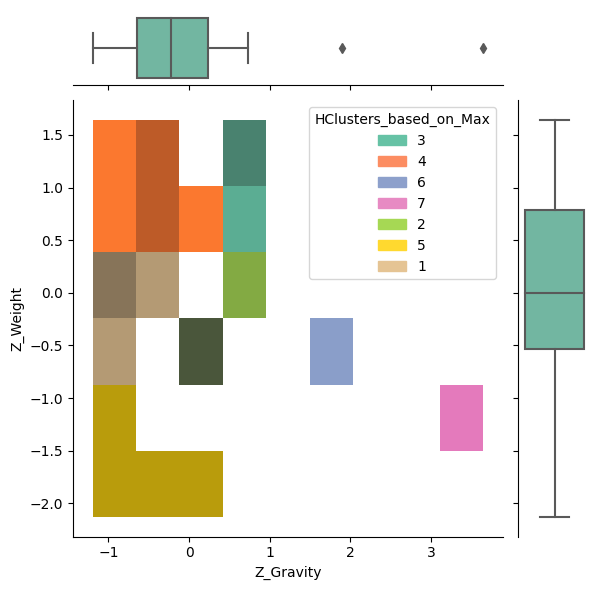

In [15]:
char_attributes["HClusters_based_on_Max"] = char_attributes["HCluster_max"].apply(str)

# sns.set(rc={'axes.facecolor':'#404040', 'figure.facecolor':'#404040'})
# # sns.set_style('dark')

h = sns.JointGrid(
                data=char_attributes,
                x=x_param,
                y=y_param,
                hue="HClusters_based_on_Max",
                palette="Set2",
             )

h.plot_joint(sns.histplot)
h.plot_marginals(sns.boxplot)



# font_color = "#BFBFBF"

# # JointGrid has a convenience function
# h.set_axis_labels('x', 'y', fontsize=16)

# # or set labels via the axes objects
# h.ax_joint.set_xlabel(x_param, fontweight='bold',color=font_color )
# h.ax_joint.set_ylabel(y_param, fontweight='bold',color=font_color )



# h.tick_params(axis='x', colors='red')    #setting up X-axis tick color to red
# h.tick_params(axis='y', colors='black')  #setting up Y-axis tick color to black

# also possible to manipulate the histogram plots this way, e.g.
# h.ax_marg_y.grid('on') # with ugly consequences...

# # labels appear outside of plot area, so auto-adjust
# h.figure.tight_layout() 


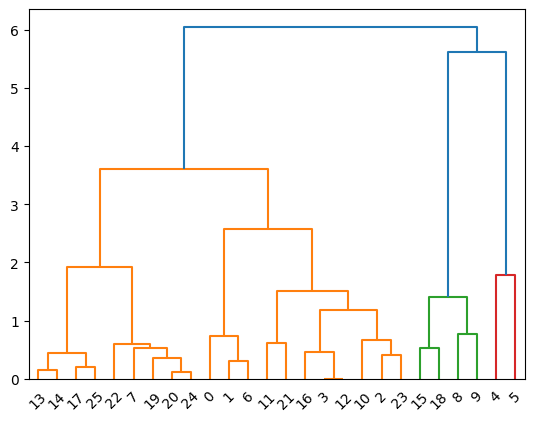

In [6]:
# Create linkage method using Ward's method
link_method = linkage(char_attributes[["Z_Gravity","Z_Weight"]], method = 'ward')

# Generate & Visualize the dendrogram
dend = dendrogram(link_method
                  #,labels = labelList
                  #,truncate_mode='lastp'
                  #,p=10
                 )

In [9]:
# Method 1: criterion = 'maxclust' where a cut is defined based on the number of clusters
clusters_max = fcluster(link_method, 10, criterion='maxclust') 
#clusters_max

# Method 2: criterion='distance' where a cut is defined based on distance in the y-axis
clusters_dist = fcluster(link_method, 1.5, criterion='distance')
#clusters_dist

#Apply the clusters back to the dataset
char_attributes['HCluster_max'] = clusters_max
char_attributes['HCluster_dist'] = clusters_dist
# df['HCluster_dist'] = clusters_dist
char_attributes.head()

,Character,Regular Falling Speed,Fast Falling Speed,Gravity,Speed Increase,Weight,Average Falling Speed,Z_Regular_Falling_Speed,Z_Fast_Falling_Speed,Z_Gravity,Z_Speed_Increase,Z_Weight,Z_Average_Falling_Speed,HCluster_max,HCluster_dist
0,Bowser,1.9,2.40,0.130,0.263,117,2.15,-0.104299,-0.217846,0.728191,-0.301500,1.641298,-0.167406,3,3
1,Captain Falcon,2.9,3.50,0.130,0.207,104,3.20,2.065123,1.975955,0.728191,-0.728527,0.851044,2.067400,3,3
2,Donkey Kong,2.4,2.96,0.100,0.233,114,2.68,0.980412,0.898998,-0.146985,-0.530265,1.458932,0.960639,6,5
3,Dr. Mario,1.7,2.30,0.095,0.353,100,2.00,-0.538183,-0.417282,-0.292847,0.384794,0.607888,-0.486664,5,5
4,Falco,3.1,3.50,0.170,0.129,80,3.30,2.499007,1.975955,1.895093,-1.323315,-0.607888,2.280239,9,7


In [10]:
# Analyze Data in Terms of HClusters
# Cluster_Max
aggdata_max =char_attributes.iloc[:,1:].groupby('HCluster_max').mean()
aggdata_max['Frequency']=char_attributes.HCluster_max.value_counts().sort_index()
aggdata_max

for clst in range(1,1+len(char_attributes["HCluster_max"].unique())):
    print(char_attributes[char_attributes["HCluster_max"]==clst][["Character"]])

,Regular Falling Speed,Fast Falling Speed,Gravity,Speed Increase,Weight,Average Falling Speed,Z_Regular_Falling_Speed,Z_Fast_Falling_Speed,Z_Gravity,Z_Speed_Increase,Z_Weight,Z_Average_Falling_Speed,HCluster_dist,Frequency
HCluster_max,,,,,,,,,,,,,,
1,1.650000,2.162500,0.080000,0.330750,88.000000,1.906250,-0.646655,-0.691508,-0.730436,0.215127,-0.121578,-0.686200,1.0,4
2,2.032000,2.560000,0.110800,0.264000,85.600000,2.296000,0.182065,0.101252,0.168079,-0.293875,-0.267471,0.143339,2.0,5
3,2.266667,2.833333,0.130000,0.256667,110.000000,2.550000,0.691155,0.646379,0.728191,-0.349795,1.215777,0.683949,3.0,3
4,1.500000,2.150000,0.067500,0.446500,105.000000,1.825000,-0.972068,-0.716437,-1.095092,1.097777,0.911832,-0.859131,4.0,2
5,1.743333,2.266667,0.093333,0.302667,98.000000,2.005000,-0.444175,-0.483761,-0.341468,0.000978,0.486311,-0.476022,5.0,3
6,2.153333,2.963333,0.101000,0.386333,108.666667,2.558333,0.445288,0.905646,-0.117812,0.638977,1.134725,0.701685,5.0,3
7,1.800000,2.400000,0.102500,0.334500,57.500000,2.100000,-0.321241,-0.217846,-0.074053,0.243722,-1.975637,-0.273825,6.0,2
8,1.450000,1.800000,0.072000,0.240500,65.000000,1.625000,-1.080539,-1.414465,-0.963816,-0.473074,-1.519721,-1.284809,6.0,2
9,3.100000,3.500000,0.170000,0.129000,80.000000,3.300000,2.499007,1.975955,1.895093,-1.323315,-0.607888,2.280239,7.0,1


In [240]:
# # Analyze Data in Terms of HClusters
# # Cluster_Max
# aggdata_max =char_attributes.iloc[:,1:].groupby('HCluster_dist').mean()
# aggdata_max['Frequency']=char_attributes.HCluster_dist.value_counts().sort_index()
# aggdata_max

In [28]:
for clst in range(1,1+len(char_attributes["HCluster_max"].unique())):
    print(char_attributes[char_attributes["HCluster_max"]==clst][["Character"]])

   Character
13     Marth
14    Mewtwo
17     Peach
25     Zelda
       Character
7   Ice Climbers
19       Pikachu
20           Roy
22         Sheik
24    Young Link
        Character
0          Bowser
1  Captain Falcon
6       Ganondorf
   Character
11     Luigi
21     Samus
    Character
3   Dr. Mario
12      Mario
16       Ness
      Character
2   Donkey Kong
10         Link
23        Yoshi
           Character
15  Mr. Game & Watch
18             Pichu
    Character
8  Jigglypuff
9       Kirby
  Character
4     Falco
  Character
5       Fox


In [25]:
# Analyze Data in Terms of HClusters
# Cluster_Max
aggdata_max =char_attributes[["Character","Weight","Gravity","Z_Weight","Z_Gravity","HCluster_max"]].groupby('HCluster_max').mean()
aggdata_max['Amount']=char_attributes.HCluster_max.value_counts().sort_index()
aggdata_max

/tmp/ipykernel_4122/337414738.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggdata_max =char_attributes[["Character","Weight","Gravity","Z_Weight","Z_Gravity","HCluster_max"]].groupby('HCluster_max').mean()


,Weight,Gravity,Z_Weight,Z_Gravity,Amount
HCluster_max,,,,,
1,88.000000,0.080000,-0.121578,-0.730436,4
2,85.600000,0.110800,-0.267471,0.168079,5
3,110.000000,0.130000,1.215777,0.728191,3
4,105.000000,0.067500,0.911832,-1.095092,2
5,98.000000,0.093333,0.486311,-0.341468,3
6,108.666667,0.101000,1.134725,-0.117812,3
7,57.500000,0.102500,-1.975637,-0.074053,2
8,65.000000,0.072000,-1.519721,-0.963816,2
9,80.000000,0.170000,-0.607888,1.895093,1


In [242]:
# for clst in range(1,1+len(char_attributes["HCluster_dist"].unique())):
#     print(char_attributes[char_attributes["HCluster_dist"]==clst][["Character","Regular Falling Speed","Weight"]])

In [243]:
# char_attributes

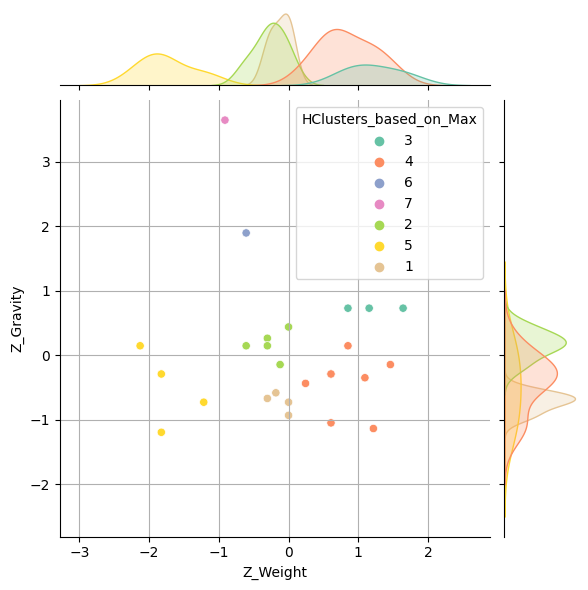

In [54]:
char_attributes["HClusters_based_on_Max"] = char_attributes["HCluster_max"].apply(str)

sns.jointplot(data=char_attributes,
              x="Z_Weight",
              y="Z_Gravity",
              hue="HClusters_based_on_Max",
              palette="Set2"
             )
plt.grid()

In [245]:
new_labels = ["Bulky","Awkward_Heavies", "Samus","Slightly Light Floaties", "Kirby","Pika","Feathers","Puff", "Mids","Fast_Fallers","Falcon"]

char_attributes["HCluster"] = char_attributes["HCluster_max"]

i = 1
for label in new_labels:
    print(i,label)
    char_attributes["HCluster"] = char_attributes["HCluster"].replace(i,label)
    i+=1

1 Bulky
2 Awkward_Heavies
3 Samus
4 Slightly Light Floaties
5 Kirby
6 Pika
7 Feathers
8 Puff
9 Mids
10 Fast_Fallers
11 Falcon


In [246]:
clst = 3
char_attributes[char_attributes["HCluster_max"]==clst]

,Character,Regular Falling Speed,Fast Falling Speed,Gravity,Speed Increase,Weight,Average Falling Speed,Z_Regular_Falling_Speed,Z_Fast_Falling_Speed,Z_Gravity,Z_Speed_Increase,Z_Weight,Z_Average_Falling_Speed,HCluster_max,HCluster_dist,HClusters_based_on_Max,HCluster
9,Kirby,1.6,2.0,0.08,0.25,70,1.8,-0.755126,-1.015592,-0.730436,-0.400631,-1.215777,-0.912341,3,2,3,Samus


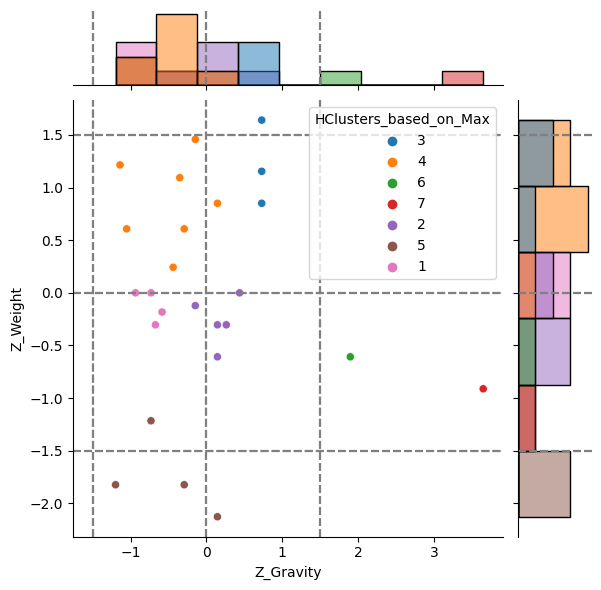

In [53]:
g = sns.JointGrid(data=char_attributes, x=x_param, y=y_param, hue="HClusters_based_on_Max")
g.plot(sns.scatterplot, sns.histplot)

# Add Distribution Lines
temp_x = -1.5
g.refline(x=temp_x, y=-1.5)
g.refline(x=temp_x, y=0)
g.refline(x=temp_x, y=1.5)

temp_x = 0
g.refline(x=temp_x, y=-1.5)
g.refline(x=temp_x, y=0)
g.refline(x=temp_x, y=1.5)

temp_x = 1.5
g.refline(x=temp_x, y=-1.5)
g.refline(x=temp_x, y=0)
g.refline(x=temp_x, y=1.5)

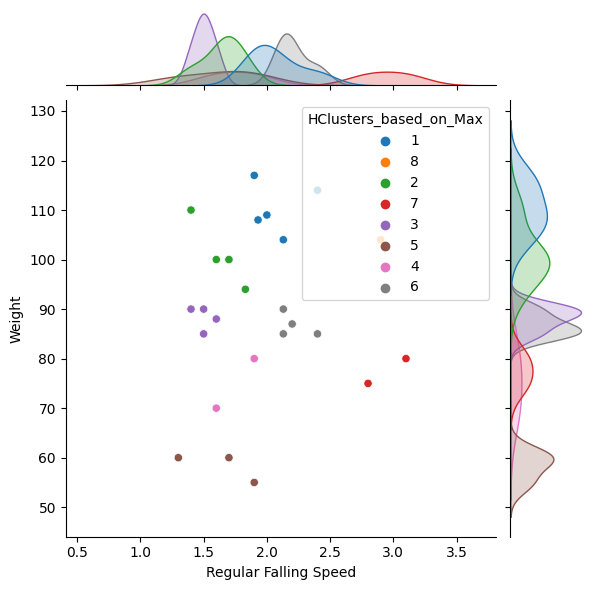

In [42]:
char_attributes["HClusters_based_on_Max"] = char_attributes["HCluster_max"].apply(str)

sns.jointplot(data=char_attributes, x="Regular Falling Speed", y="Weight", hue="HClusters_based_on_Max");

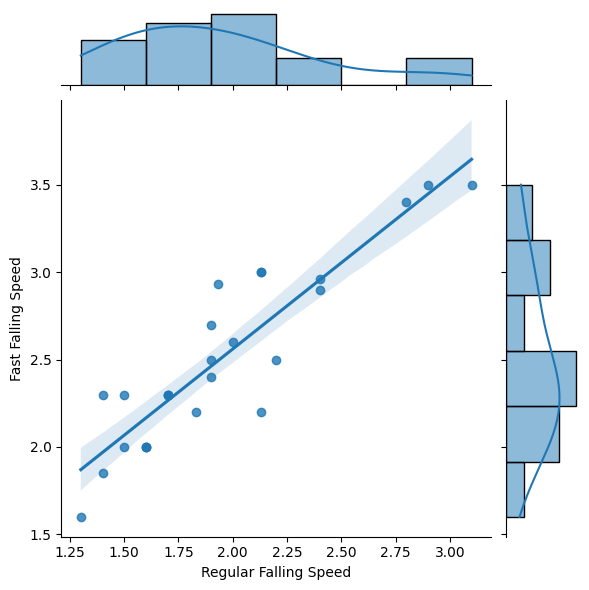

In [13]:
sns.jointplot(data=char_attributes, x="Regular Falling Speed", y="Fast Falling Speed", kind="reg");

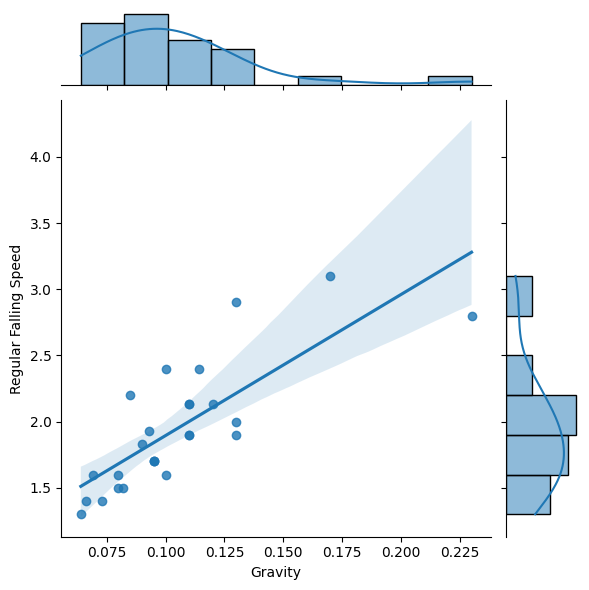

In [12]:
sns.jointplot(data=char_attributes, x="Gravity", y="Regular Falling Speed", kind="reg");

In [15]:
char_attributes.iloc[:,1:7]

,Regular Falling Speed,Fast Falling Speed,Gravity,Speed Increase,Weight,HCluster_max
0,1.90,2.40,0.130,0.263,117,1
1,2.90,3.50,0.130,0.207,104,1
2,2.40,2.96,0.100,0.233,114,1
3,1.70,2.30,0.095,0.353,100,1
4,3.10,3.50,0.170,0.129,80,2
5,2.80,3.40,0.230,0.214,75,3
6,2.00,2.60,0.130,0.300,109,1
7,1.60,2.00,0.100,0.250,88,2
8,1.30,1.60,0.064,0.231,60,3
9,1.60,2.00,0.080,0.250,70,3


In [198]:
char_attributes[["Character","Regular Falling Speed","Fast Falling Speed"]]

,Character,Regular Falling Speed,Fast Falling Speed
0,Bowser,1.90,2.40
1,Captain Falcon,2.90,3.50
2,Donkey Kong,2.40,2.96
3,Dr. Mario,1.70,2.30
4,Falco,3.10,3.50
5,Fox,2.80,3.40
6,Ganondorf,2.00,2.60
7,Ice Climbers,1.60,2.00
8,Jigglypuff,1.30,1.60
9,Kirby,1.60,2.00


In [16]:
char_attributes.head()

,Character,Regular Falling Speed,Fast Falling Speed,Gravity,Speed Increase,Weight,Average Falling Speed,Z_Regular_Falling_Speed,Z_Fast_Falling_Speed,Z_Gravity,Z_Speed_Increase,Z_Weight,Z_Average_Falling_Speed,HCluster_max,HCluster_dist,HClusters_based_on_Max
0,Bowser,1.9,2.40,0.130,0.263,117,2.15,-0.104299,-0.217846,0.728191,-0.301500,1.641298,-0.167406,3,3,3
1,Captain Falcon,2.9,3.50,0.130,0.207,104,3.20,2.065123,1.975955,0.728191,-0.728527,0.851044,2.067400,3,3,3
2,Donkey Kong,2.4,2.96,0.100,0.233,114,2.68,0.980412,0.898998,-0.146985,-0.530265,1.458932,0.960639,4,5,4
3,Dr. Mario,1.7,2.30,0.095,0.353,100,2.00,-0.538183,-0.417282,-0.292847,0.384794,0.607888,-0.486664,4,5,4
4,Falco,3.1,3.50,0.170,0.129,80,3.30,2.499007,1.975955,1.895093,-1.323315,-0.607888,2.280239,6,7,6


In [17]:
import pandas as pd
import plotly.express as px

In [18]:
df = char_attributes

In [39]:
fig = px.scatter(
    data_frame=df,
    x=x_param,
    y=y_param,
    range_x=[-3, 3],
    range_y=[-3, 3],
    color="HClusters_based_on_Max",
    marginal_y='violin',
    marginal_x='violin',
    width=1000,
    height=600
    )

fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
    paper_f
)



fig.show()
